# Etapa 01: Análise exploratória dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data.csv', encoding='ISO-8859-1')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)

# Etapa 02: Pré-processamento dos dados

In [3]:
df.dropna(inplace=True)

df['CustomerID'] = df['CustomerID'].astype(str)

import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

df_RFM = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Quantity': 'sum',
    'UnitPrice': 'sum'
})

df_RFM.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Quantity': 'MonetaryValueQuantity',
    'UnitPrice': 'MonetaryValue'}, inplace=True)

df_RFM['MonetaryValueAvg'] = df_RFM['MonetaryValue'] / df_RFM['Frequency']
df_RFM.drop(columns=['MonetaryValueQuantity'], inplace=True)

scaler = MinMaxScaler()
df_RFM_scaled = pd.DataFrame(scaler.fit_transform(df_RFM), columns = df_RFM.columns, index=df_RFM.index)

## Justificativa da escolha das variáveis
As variáveis Recência (R), Frequência (F) e Valor Monetário (M) são amplamente utilizadas na análise de comportamento de clientes, pois capturam dimensões importantes do relacionamento cliente-empresa. A Recência indica há quanto tempo o cliente fez a última compra, a Frequência representa a quantidade de compras realizadas e o Valor Monetário mede o montante total gasto pelo cliente. A combinação dessas três variáveis permite segmentar os clientes em grupos com características de compra distintas, possibilitando a criação de campanhas de marketing mais personalizadas e eficazes.

# Etapa 03: Seleção de um algoritmo de clusterização

## Justificativa da escolha do algoritmo KMeans
O algoritmo KMeans foi escolhido por ser um método de particionamento simples e eficiente para grandes conjuntos de dados. Ele busca agrupar os dados em k clusters, onde cada ponto é atribuído ao cluster com a média mais próxima. Sua facilidade de implementação e interpretação o torna adequado para este tipo de análise.


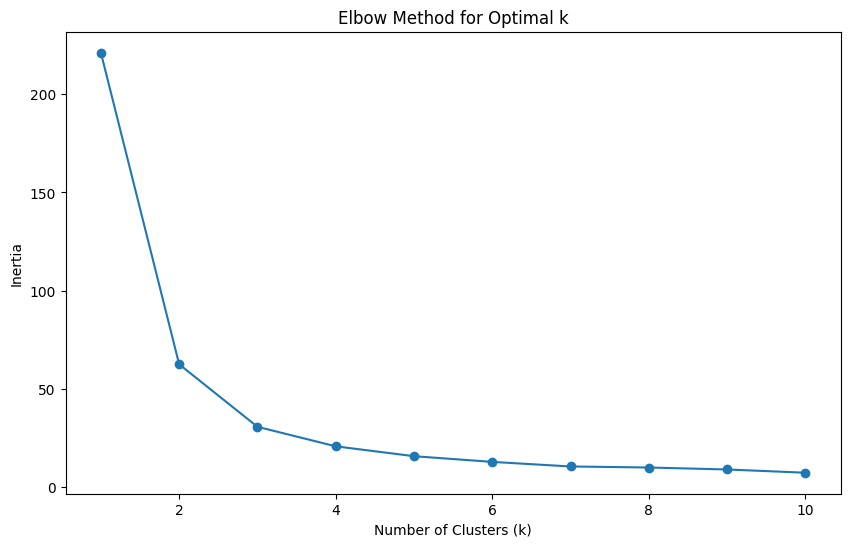

In [4]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(df_RFM_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## Análise do Método Elbow
O método Elbow é utilizado para identificar o número ideal de clusters (k) em algoritmos de particionamento como o KMeans. O gráfico mostra a inércia (soma dos quadrados das distâncias dos pontos aos seus respectivos centros de cluster) em função do número de clusters. Observa-se um ponto de "cotovelo" no gráfico, a partir do qual a redução da inércia se torna menos significativa. Este ponto indica o número ideal de clusters, pois representa um equilíbrio entre a variância intra-cluster e a complexidade do modelo. No gráfico gerado, o ponto de cotovelo está em k = 3, o que sugere que este é o número ideal de clusters para os dados em questão.

In [5]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_RFM['Cluster'] = kmeans.fit_predict(df_RFM_scaled)

# Etapa 04: Análise dos clusters obtidos

## Análise dos Clusters
A análise dos clusters permite identificar diferentes perfis de clientes com base em seu comportamento de compra. Ao analisar as características de cada cluster, é possível segmentar os clientes em grupos com necessidades e preferências distintas, possibilitando a criação de campanhas de marketing mais personalizadas e eficazes.

In [6]:
print(df_RFM.groupby('Cluster').mean())

            Recency  Frequency  MonetaryValue  MonetaryValueAvg
Cluster                                                        
0         16.401996  58.625227     197.322477          3.990991
1        109.497423  22.783505      69.943814          4.271176
2         59.242792  31.345979     105.189196          6.160813


# Etapa 05: Interpretação dos dados obtidos

## Interpretação dos Clusters
- Cluster 0: Clientes com alta Recência, alta Frequência e alto Valor Monetário. São os clientes mais valiosos, que compram com frequência e gastam valores elevados.
- Cluster 1: Clientes com baixa Recência, baixa Frequência e baixo Valor Monetário. São clientes menos engajados, que compram com pouca frequência e gastam valores baixos.
- Cluster 2: Clientes com média Recência, média Frequência e médio Valor Monetário. São clientes intermediários, com um perfil de compra equilibrado.


## Propostas de Ações de Marketing
- Cluster 0 (Clientes Valiosos): Oferecer programas de fidelidade exclusivos, descontos personalizados, acesso antecipado a lançamentos e atendimento diferenciado.
- Cluster 1 (Clientes Menos Engajados): Enviar e-mails marketing com promoções e ofertas especiais, buscar entender os motivos do baixo engajamento e oferecer incentivos para aumentar a frequência de compra.
- Cluster 2 (Clientes Intermediários): Desenvolver campanhas de marketing segmentadas, com ofertas e promoções relevantes para o perfil de cada cliente, buscando aumentar a frequência e o valor das compras.


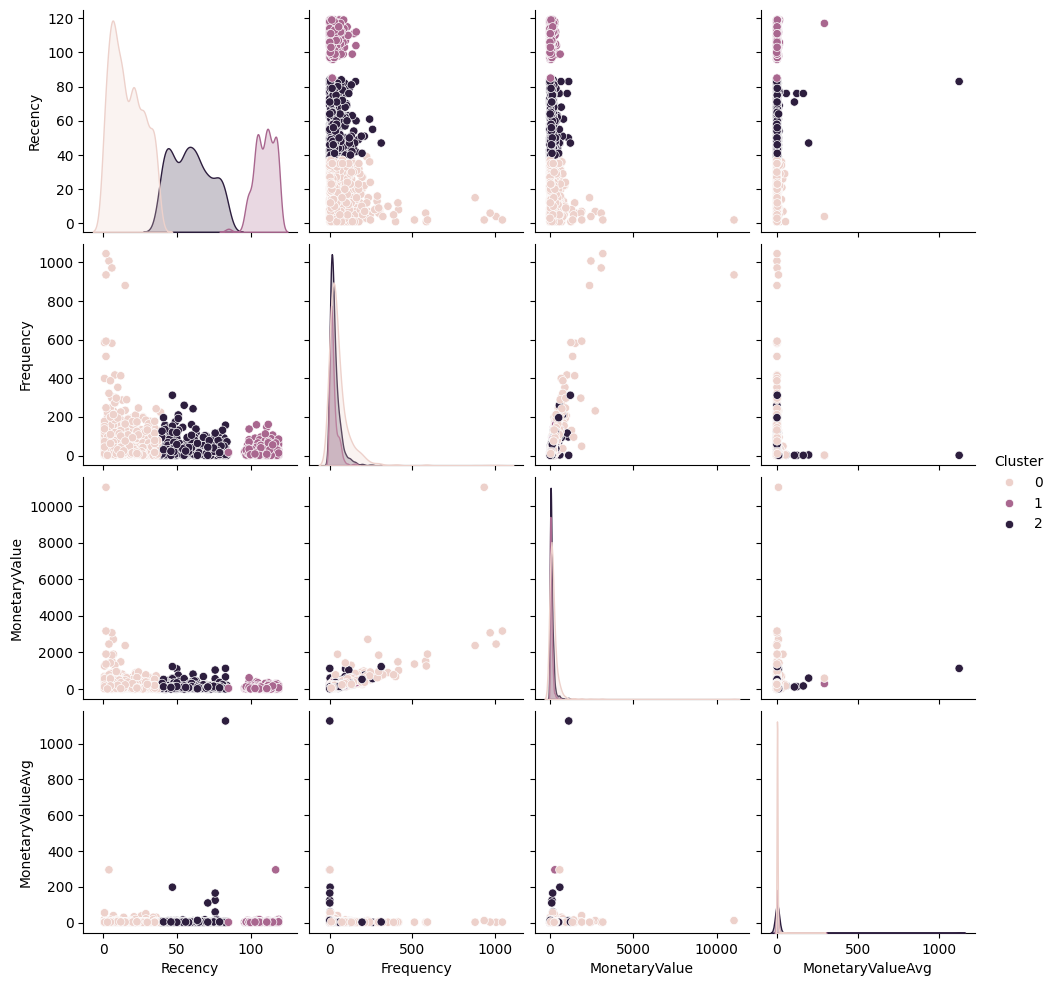

In [7]:
sns.pairplot(df_RFM, hue='Cluster')
plt.show()

# Conclusão

A análise de clusters utilizando RFM permitiu identificar diferentes perfis de clientes com base em seu comportamento de compra.
As informações obtidas possibilitam a criação de campanhas de marketing mais personalizadas e eficazes, direcionadas para as necessidades e preferências de cada grupo de clientes.
As ações de marketing propostas visam fortalecer o relacionamento com os clientes, aumentar a fidelidade e impulsionar o crescimento das vendas.